## ETS: Exponential Smoothing State Space

> `ARIMA` How the present depends on the past after removing non-stationary\
> `ETS` &nbsp;&nbsp;&nbsp;&nbsp; Decomposes a series into components and <b>smooths</b> them.

Components are self explanatory:
 - E: Error
 - T: Trend
 - S: Seasonality

---

<u>#ETS is all about</u>
- Break series into Level, Trend, Seasonal
- Update each component with exponentially weighted averages <mark>(α, β, γ, φ)</mark>
- Combine these components to forecast

<br>

#Detail Component Types
1. Trend (T)
    - `N(None)`: No trend, the series bounce around a level
    - `A(Addictive)`: Linear trend (adds constant amount each period)
    - `Ad(Addictive damped)`: Trend that weakens over time
    - `M(Multiplicative)`: Percentage-based trend

2. Seasonal(S)
    - `N(None)`: No Seasonal Pattern
    - `A(Addictive)`: Seasonal effect is constant
    - `M(Multiplicative):` Seasonal effect is proportional to a level

3. Error(E)
    - `A(Addictive)`: Error is independent of the level
    - `M(Multiplicative)`: Error grow with level


<br>

#### Smoothing Concept

How ets works is using the state variables:

- `Level(l)`: Current baseline value
- `Trend(b)`: Current growth rate
- `Seasonal(s)`: Seasonal adjustment factors

At each time step, these states are updated using <mark>weighted averages</mark>.\
Each update gives more weight α to recent observations:\
And the weights decay exponentially:

Recent data: Example weight  α = 0.8\
1 Period ago: α = (1-α)^1\
2 Period ago: α = (1-α)^2\
3 Period ago: α = (1-α)^3

> Hence, exponential smoothing

<br>

#Smoothing parameters (Or Learning rates :)\
- `α (Level Smoothing)`
- `β (Trend Smoothing)`
    - φ (Damping parameter)
- `γ (Seasonal Smoothing)`

> Holt-Winters, also known as Triple Exponential Smoothing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing, SimpleExpSmoothing, Holt

#Level - true baseline or SIGNAL

In [2]:
np.random.seed(555)
days = 30
true_level = 1000

# Random daily fluctuation
# noise +- 50 fluctuations
noise = np.random.normal(0, 50, days) 

observations = true_level + noise

for i in range(10):
    print(f"  Day {i+1}: {observations[i]:.0f} visitors (Level={true_level}, Noise={noise[i]:+.0f})")

  Day 1: 1007 visitors (Level=1000, Noise=+7)
  Day 2: 1018 visitors (Level=1000, Noise=+18)
  Day 3: 946 visitors (Level=1000, Noise=-54)
  Day 4: 1012 visitors (Level=1000, Noise=+12)
  Day 5: 992 visitors (Level=1000, Noise=-8)
  Day 6: 1022 visitors (Level=1000, Noise=+22)
  Day 7: 958 visitors (Level=1000, Noise=-42)
  Day 8: 1108 visitors (Level=1000, Noise=+108)
  Day 9: 1017 visitors (Level=1000, Noise=+17)
  Day 10: 981 visitors (Level=1000, Noise=-19)


#Simple Exponential Smoothing for Level Only ETS(A,N,N)

In [3]:
def simple_exponential_smoothing(data, alpha):
    n = len(data)
    level = np.zeros(n)
    level[0] = data[0]
    for t in range(1, n):
        # most recent day data[t] gets multiply by the highest weight
        # (1-alpha) is recursively multipled by previous day
        level[t] = alpha * data[t] + (1 - alpha) * level[t-1]
    return level

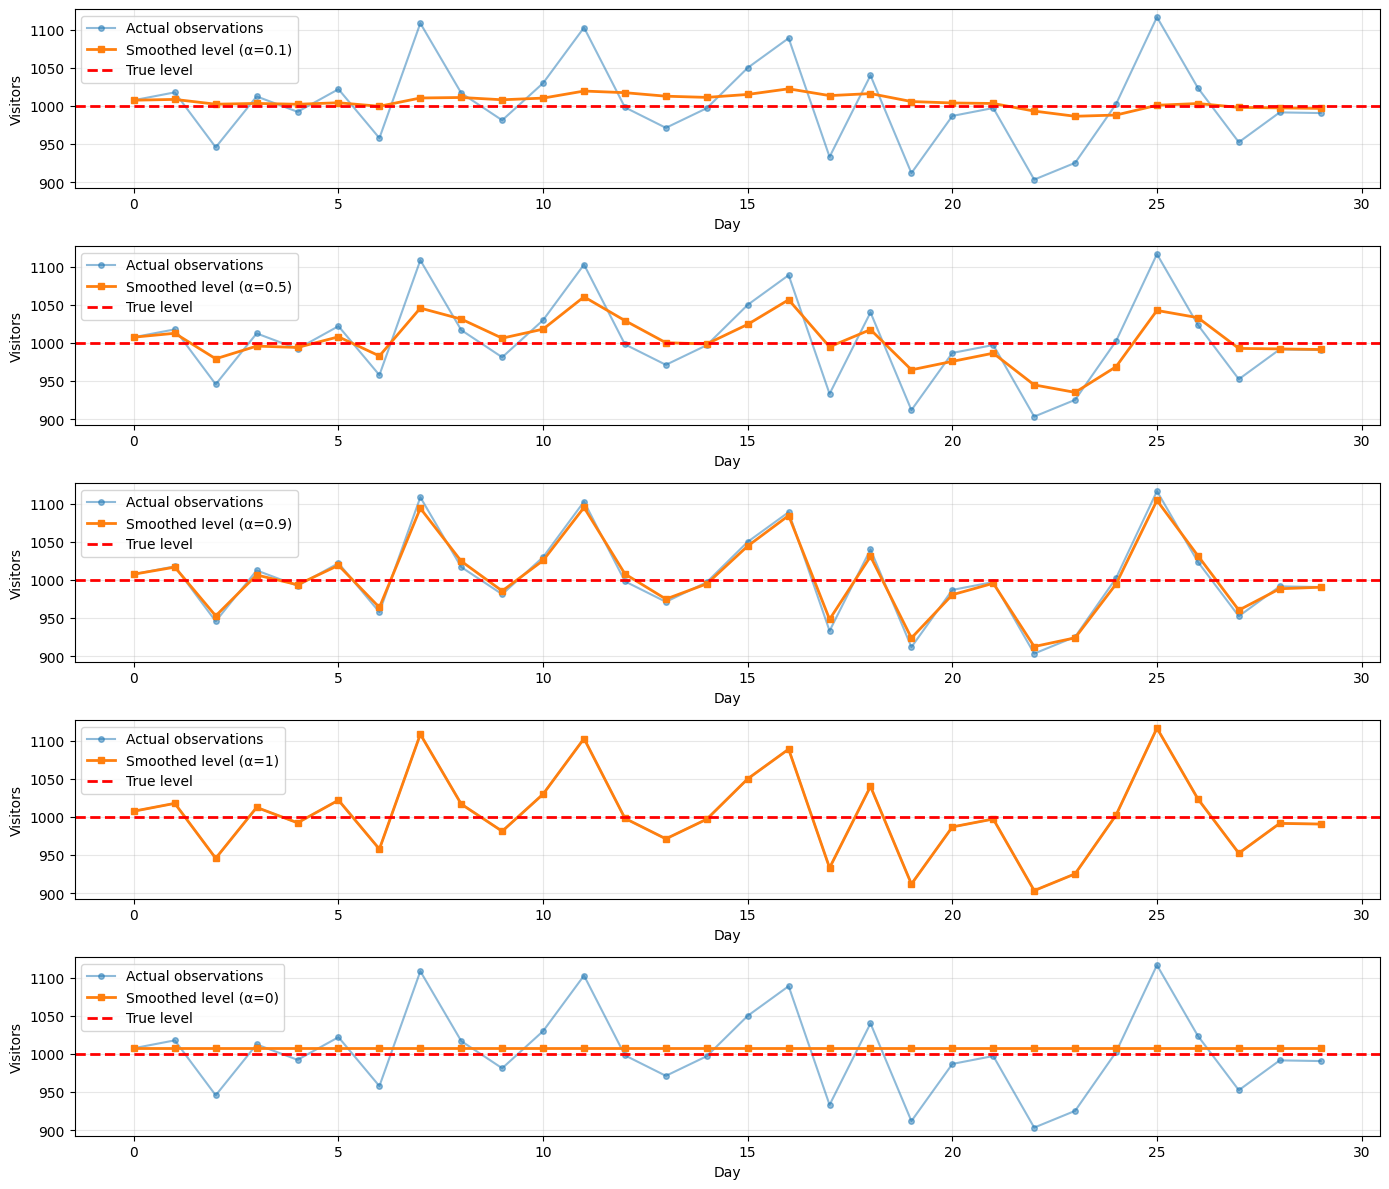

In [4]:
alphas = [0.1, 0.5, 0.9, 1, 0]

fig, axes = plt.subplots(len(alphas), 1, figsize=(14, 12))

for idx, alpha in enumerate(alphas):
    smoothed = simple_exponential_smoothing(observations, alpha)
    ax = axes[idx]
    ax.plot(observations, 'o-', alpha=0.5, label='Actual observations', markersize=4)
    ax.plot(smoothed, 's-', linewidth=2, label=f'Smoothed level (α={alpha})', markersize=4)
    ax.axhline(y=true_level, color='red', linestyle='--', label='True level', linewidth=2)
    ax.set_xlabel('Day')
    ax.set_ylabel('Visitors')
    ax.legend()
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

#Holt's Linear Trend

In [5]:
# data with trend
months = 24

true_level_start = 1000
true_trend = 50  # Growing by 50 per month

true_level = true_level_start + true_trend * np.arange(months)

noise = np.random.normal(0, 80, months)

sales_with_trend = true_level + noise
sales_with_trend

array([ 993.43446801, 1045.56552969, 1206.81804882, 1128.77231064,
       1326.28992087, 1338.93792692, 1298.14952366, 1412.67897163,
       1310.36277722, 1489.3321558 , 1472.51924322, 1421.61387462,
       1597.46566433, 1687.08670604, 1808.56351561, 1714.8876685 ,
       1698.76133111, 1803.52757177, 1811.46467187, 1870.43452026,
       2035.72616307, 1998.14532184, 2050.16064634, 2235.79255924])